In [2]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict


In [8]:

def getRatings(fileName, ratingsDict):
    ratings  = pickle.load( open( fileName, "rb" ) )


    for key, value in ratings.items():
        index = key.split('_')[1]
        ratingsDict['maxIndex'] = max(ratingsDict['maxIndex'], int(index))  
        
        ratingsDict['Craftsmanship'][key].append(value['craftsmanship'])
        ratingsDict['Creativity'][key].append(value['creativity'])
        ratingsDict['Consistency'][key].append(value['consistency'])

    return ratingsDict



def plotRatings(ratingsDict, criteria):
    scores = np.array(range(10))
    size = ratingsDict['maxIndex'] + 1
    img = np.zeros((size,size), dtype=np.float32)


    baseValueList = []
    for key, value in ratingsDict[criteria].items():
        x,y = key.split('_')   
        value = [np.sum(scores*np.array(v)) for v in value]

        if y == '0':
            baseValueList.append(value)
        x = int(x)
        y = int(y)
        if len(value) > 0:
            img[x, y] = sum(value)/len(value)

    baseValue = np.mean(baseValueList)

    mask = img == 0

    img[mask] = baseValue

    plt.figure()
    
    img = img + (5 - baseValue)

    plt.imshow(img, cmap='RdBu', vmin=0, vmax=10)
    plt.colorbar()

    plt.title(criteria)
    plt.ylabel('Repeat start layer')
    plt.xlabel('Repeat stop layer')
    return img, baseValueList   



def print_rating(img):
    print(f"Maximum Value for combined: {np.unravel_index(np.argmax(img), np.array(img).shape)}, with value: {np.max(img)}")

def topN(ratingsDict, n):
    scores = np.array(range(10))

    # Compute averages and store them with keys
    scores = np.array(range(10))
    averages = [(key, np.mean([np.sum(scores*np.array(v)) for v in values])) for key, values in ratingsDict.items()]

    print(f'{averages=}')

    # Sort based on the averages
    averages.sort(key=lambda x: x[1], reverse=True)

    # Select the top n keys and their averages
    top_n_keys_with_averages = averages[:n]

    print(f"Top {n} keys with their averages:")
    for key, avg in top_n_keys_with_averages:
        print(f"Key: {key}, Average: {avg}")



def bottomN(ratingsDict, n):
    scores = np.array(range(10))

    # Compute averages and store them with keys
    scores = np.array(range(10))
    averages = [(key, np.mean([np.sum(scores*np.array(v)) for v in values])) for key, values in ratingsDict.items()]

    print(f'{averages=}')

    # Sort based on the averages
    averages.sort(key=lambda x: x[1], reverse=False)

    # Select the top n keys and their averages
    top_n_keys_with_averages = averages[:n]

    print(f"Top {n} keys with their averages:")
    for key, avg in top_n_keys_with_averages:
        print(f"Key: {key}, Average: {avg}")



def plotHistograms(ratingsDict1, criteria):
    scores = np.array(range(10))
    baseRatingList = []
    ratingList = []
    for key, value in ratingsDict1[criteria].items():
        if key.split('_')[1] != '0':
            ratingList.extend([np.sum(scores*np.array(v)) for v in value])
        else:
            baseRatingList.extend([np.sum(scores*np.array(v)) for v in value])
    plt.figure()



    plt.hist(ratingList, bins=100, edgecolor='black', density=True)
    plt.hist(baseRatingList, bins=30, edgecolor='black', density=True, alpha=0.5)
    plt.axvline(x=np.mean(baseRatingList), color='r', linestyle='--', linewidth=2)
    plt.axvline(x=np.mean(baseRatingList) - np.std(baseRatingList), color='r', linestyle='--', linewidth=1)
    plt.axvline(x=np.mean(baseRatingList) + np.std(baseRatingList), color='r', linestyle='--', linewidth=1)
    # Adding labels and title
    plt.xlabel('Rating')
    plt.ylabel('Frequency')
    plt.title(f'{criteria} Ratings')
    plt.xlim(0, 10)

    plt.show()

def getStandardDeviation(ratingsDict, criteria):
    ratingList = []
    for l in ratingsDict[criteria].values():
        ratingList.append(np.std(l))

    return np.mean(ratingList)


def getAllRatings(fileName):
    ratingsDict = defaultdict(lambda: defaultdict(list))
    ratingsDict['maxIndex'] = 0
    for i in range(1,11):
        ratingsDict = getRatings(fileName.format(i), ratingsDict)

    craft, craftBaseValueList = plotRatings(ratingsDict, 'Craftsmanship')
    creat,  creatBaseValueList = plotRatings(ratingsDict, 'Creativity')
    consist, consistBaseValueList = plotRatings(ratingsDict, 'Consistency')

    plt.figure()

    combined = (craft + creat + consist)/3
    plt.imshow(combined, cmap='RdBu', vmin=0, vmax=10)
    # Adding labels and title
    plt.xlabel('Rating')
    plt.ylabel('Frequency')
    plt.title(f'Combined Ratings')
    return ratingsDict


def plotAllHistograms(ratingsDict):
    plotHistograms(ratingsDict, 'Craftsmanship')
    plotHistograms(ratingsDict, 'Creativity')
    plotHistograms(ratingsDict, 'Consistency')
    

# TinyLlama

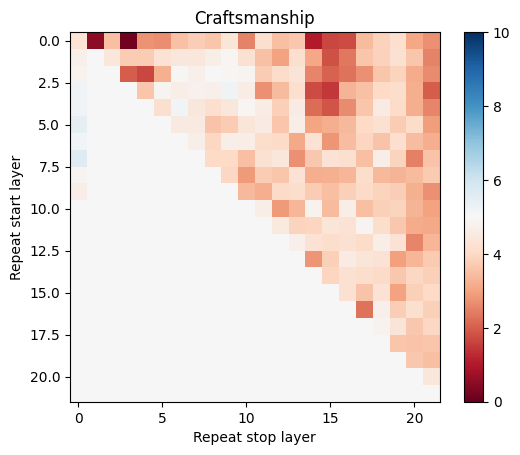

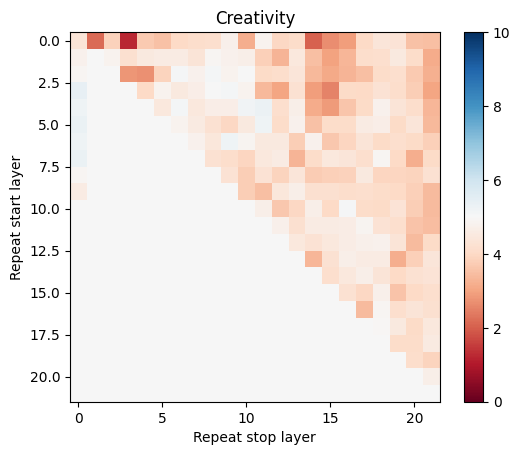

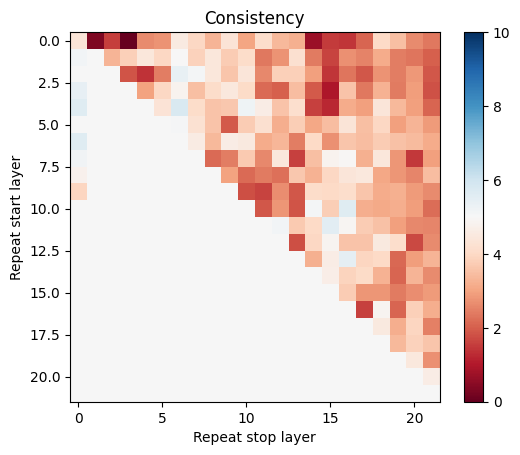

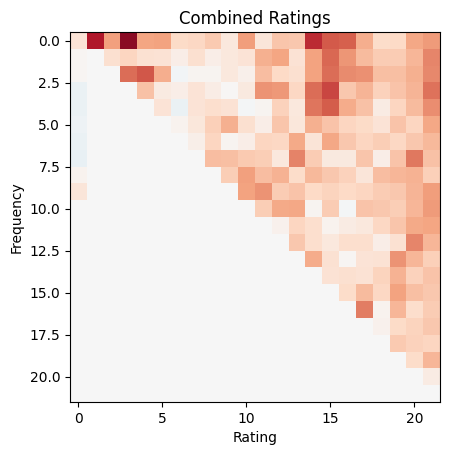

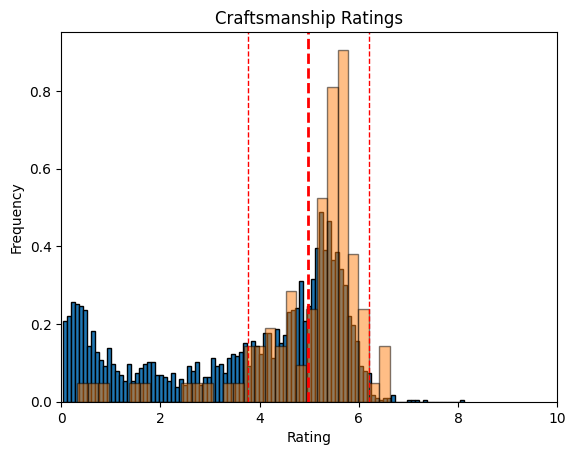

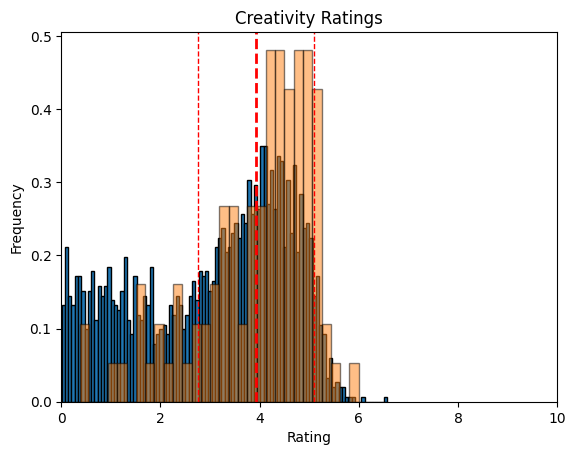

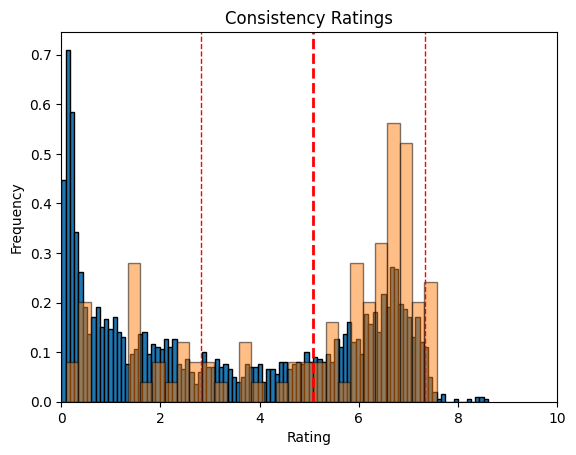

averages=[('1_0', 4.5577373178169065), ('2_0', 4.576826116061748), ('3_0', 5.007375487787115), ('4_0', 4.999518810349316), ('5_0', 4.931623174519857), ('6_0', 4.978149040255358), ('7_0', 5.041255229129505), ('8_0', 4.49620855298649), ('9_0', 4.049230418294635), ('0_0', 3.9962455214585004), ('0_1', 0.6688428144998951), ('0_2', 2.6244783189755574), ('1_2', 3.8512189932599634), ('0_3', 0.14031756106725488), ('1_3', 3.58249995265834), ('2_3', 1.8625373890124146), ('0_4', 2.697039035740148), ('1_4', 3.893861473228632), ('2_4', 1.5753028321238294), ('3_4', 3.1956913554671127), ('0_5', 2.652638775044983), ('1_5', 3.94458101902502), ('2_5', 2.8484951570893933), ('3_5', 4.209740510630834), ('4_5', 3.984875498496859), ('0_6', 3.6951210527398684), ('1_6', 4.338160118572527), ('2_6', 4.797965658564179), ('3_6', 4.332186296591031), ('4_6', 4.997531543464556), ('5_6', 4.48174144425265), ('0_7', 3.610329271902004), ('1_7', 3.872376064676557), ('2_7', 4.539741341762973), ('3_7', 3.989039708900789), ('

In [60]:
directory = 'Ratings/Mixtral/'
# directory = ''
fileName = directory + 'TinyLlama-1.1B-Chat-v1.0-5.0bpw-h6-exl2-stories_{}_Ratings_Mixtral_instruct2.p'
                        # TinyLlama-1.1B-Chat-v1.0-5.0bpw-h6-exl2-stories_1_Ratings_Mistral_mistral_instruct

tinyMixtral = getAllRatings(fileName)

plotAllHistograms(tinyMixtral)


combined_dict = {}
for key in tinyMixtral['Craftsmanship']:
    combined_dict[key] = tinyMixtral['Craftsmanship'][key] + tinyMixtral['Creativity'][key] + tinyMixtral['Consistency'][key]
topN(combined_dict, 5)

In [61]:


scores = np.array(range(10))

baseLine = {}

for k, values in tinyMixtral['Craftsmanship'].items():
    if k.split('_')[1] == '0':
        print(k, v)
        baseLine[k] = [np.sum(scores*np.array(v)) for v in values]


baseLine


1_0 [array([1.4737409e-03, 1.3446804e-02, 9.4809212e-02, 2.2043800e-01,
       3.3091664e-01, 1.7712693e-01, 1.3794658e-01, 2.3233997e-02,
       5.9544516e-04, 1.2651133e-05], dtype=float32), array([2.6482783e-05, 3.3477376e-05, 4.1426046e-04, 4.4537196e-03,
       3.8474262e-02, 1.4183679e-01, 6.0655904e-01, 1.7929851e-01,
       2.8815892e-02, 8.7514753e-05], dtype=float32), array([8.3151468e-07, 3.8972308e-07, 3.2377177e-06, 1.6933853e-04,
       8.9611141e-03, 1.6908383e-01, 6.7927063e-01, 1.3800220e-01,
       4.5059314e-03, 2.4727660e-06], dtype=float32), array([7.9860154e-04, 4.0556332e-03, 3.3170778e-02, 1.2616706e-01,
       2.3387678e-01, 2.6919052e-01, 2.5887799e-01, 6.5967970e-02,
       7.8787506e-03, 1.5939489e-05], dtype=float32), array([4.7541280e-06, 3.2420337e-06, 5.0319282e-05, 4.6009282e-03,
       8.9568891e-02, 3.2762942e-01, 5.2355027e-01, 5.3067811e-02,
       1.5172252e-03, 7.1089680e-06], dtype=float32), array([6.5549707e-01, 3.0010843e-01, 4.1578420e-02, 2.6

{'1_0': [5.295452345470039,
  0.871252395590659,
  4.591618650942792,
  5.602662608145295,
  5.131447263793234,
  4.877859445176,
  5.666480944884825,
  4.061248047199342,
  5.4620596892712,
  5.687011260683903],
 '2_0': [3.954648012712937,
  0.567462329993532,
  5.579381333628362,
  4.703759710311715,
  5.5883256748453505,
  5.5940441803413705,
  5.3788590417862,
  5.522863803860673,
  5.514313706121243,
  5.57604844205548],
 '3_0': [4.7866623709123814,
  3.6507709926227108,
  5.687969121742867,
  6.002662298054247,
  5.728532442669234,
  6.618123102224217,
  5.8976922355030865,
  4.197308901423185,
  5.142066603875719,
  4.295600060943798],
 '4_0': [5.807403330194461,
  3.87733315529573,
  6.539618169943537,
  4.676858097573131,
  5.762744917876944,
  6.3796000132985,
  4.210408340930371,
  2.7653991083152505,
  5.408575218752958,
  6.157993974040551],
 '5_0': [5.4363047052465845,
  5.495505303581012,
  6.025721399278723,
  5.05401471989228,
  5.656717375930384,
  5.418347079455998,


In [62]:
storyInt = 2

folderName = "Stories/TinyLlama-Chat-Stories"  # 1B parameter model
fileName = f"TinyLlama-1.1B-Chat-v1.0-5.0bpw-h6-exl2-stories_{storyInt}"


generatedTexts = pickle.load(open(f"{folderName}/{fileName}.p", "rb"))

In [63]:
generatedTexts['stories']['8_0']

'\n    Welcome to the competition page for the "The Secret in the Attic" theme. We have a total of 500 words to write about your secret object or letter. Your writing should be engaging, original, and creative. Your submission must include at least one sentence per paragraph. Please ensure that your writing is clear, concise, and free from grammatical errors. Your submission should also be in MLA format with proper citations. Your submission should not exceed 500 words. Don\'t forget to proofread your work carefully before submitting. Good luck!'

# Mistral

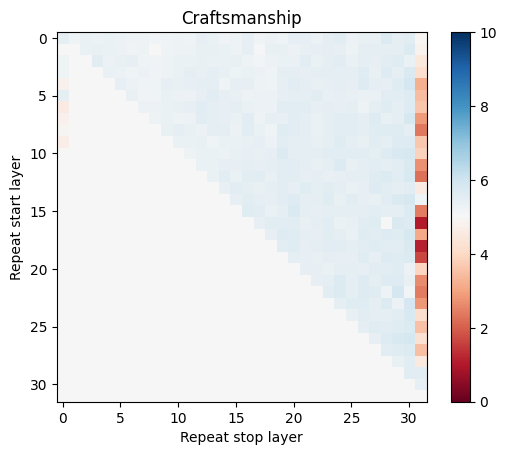

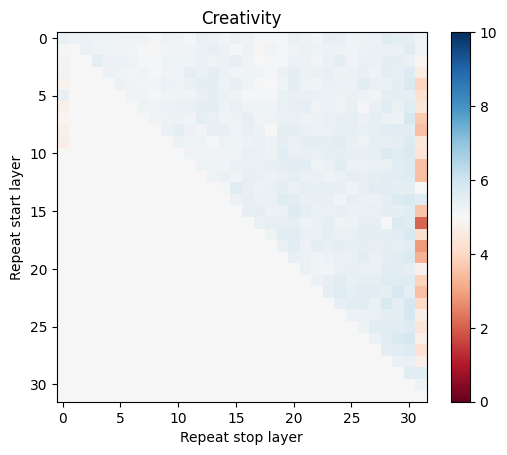

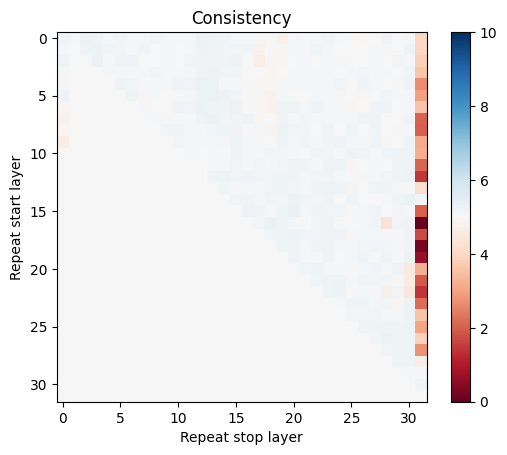

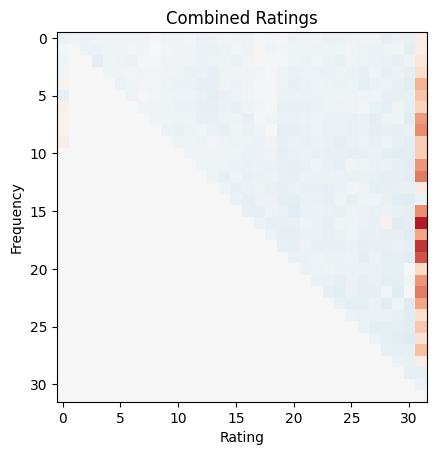

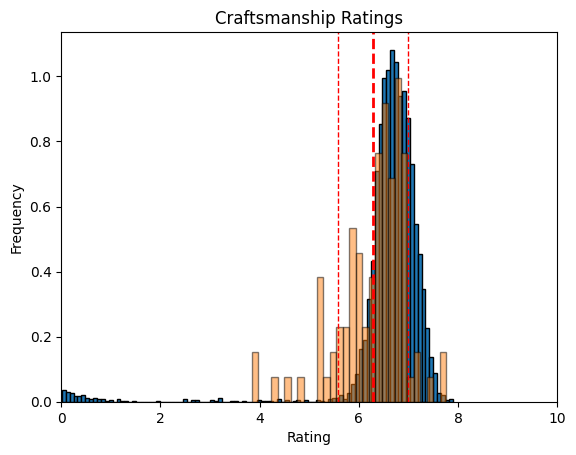

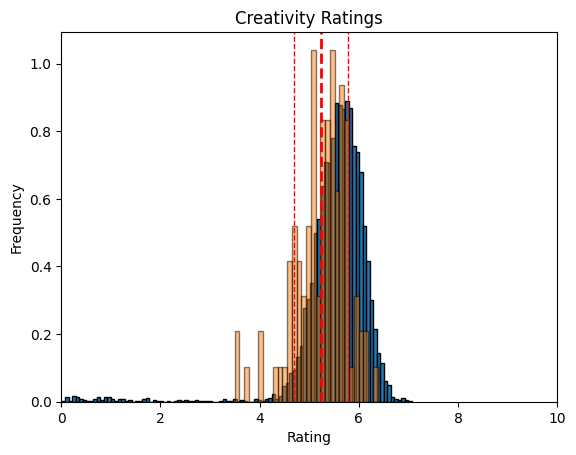

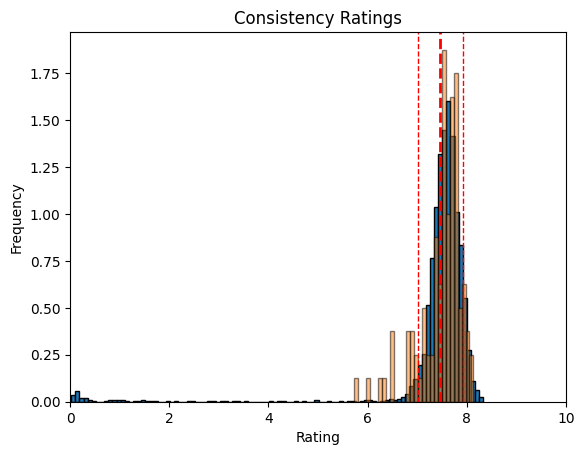

averages=[('0_0', 6.722384556494832), ('0_1', 6.512525112730598), ('0_2', 6.611217853550644), ('1_2', 6.623537503121659), ('0_3', 6.56382377854832), ('1_3', 6.665233698461303), ('2_3', 6.795291944162253), ('0_4', 6.59441426378437), ('1_4', 6.619721148766759), ('2_4', 6.5605866841328835), ('3_4', 6.5999730311721745), ('0_5', 6.569197932434565), ('1_5', 6.572413902524895), ('2_5', 6.646139110381775), ('3_5', 6.558250453454269), ('4_5', 6.709764823325242), ('0_6', 6.522324145111519), ('1_6', 6.473598960780441), ('2_6', 6.699750878048005), ('3_6', 6.476644660000576), ('4_6', 6.592000377529763), ('5_6', 6.641311265509721), ('0_7', 6.520566948546507), ('1_7', 6.553033213890226), ('2_7', 6.496580141918997), ('3_7', 6.556975315539009), ('4_7', 6.504800368698388), ('5_7', 6.455182970410448), ('6_7', 6.582083322018823), ('0_8', 6.427468947680467), ('1_8', 6.3086617792230975), ('2_8', 6.443746823285655), ('3_8', 6.453221668488943), ('4_8', 6.480667823512374), ('5_8', 6.513810922714311), ('6_8', 6

In [7]:
directory = 'Ratings/Mixtral/'
fileName = directory + 'Mistral-7B-Instruct-v0.2-stories_{}_Ratings_Mixtral_instruct2.p'

mistralMixtral = getAllRatings(fileName)

plotAllHistograms(mistralMixtral)

topN(mistralMixtral['Craftsmanship'], 10)
topN(mistralMixtral['Creativity'], 10)
topN(mistralMixtral['Consistency'], 10)

combined_dict = {}
for key in mistralMixtral['Craftsmanship']:
    combined_dict[key] = mistralMixtral['Craftsmanship'][key] + mistralMixtral['Creativity'][key] + mistralMixtral['Consistency'][key]
topN(combined_dict, 10)

# Review Mistral

## Baseline
Solid but short answer.

## Top 5 keys with their averages for Craftsmanship:
Key: 10_29, Average: 5.762960147857666
Solid, slightly more personality than the base model

Key: 10_19, Average: 5.752908515930176
Also great

Key: 5_29, Average: 5.696372842788696
even better!

Key: 20_29, Average: 5.670412302017212
Key: 13_28, Average: 5.664324855804443


## Top 5 keys with their averages for Creativity:
Key: 10_29, Average: 5.119102191925049
Key: 13_28, Average: 5.098078012466431
Key: 8_28, Average: 5.098076820373535
Key: 1_29, Average: 5.0922736644744875
Excellent!

Key: 19_29, Average: 5.088565683364868


## Top 5 keys with their averages for Consistency:
Key: 10_19, Average: 5.599330902099609
Good clear text. no issues


Key: 12_21, Average: 5.5969030380249025
Key: 3_26, Average: 5.593423223495483
Key: 10_29, Average: 5.582774114608765
Key: 2_24, Average: 5.562200546264648

# Nous Capybara

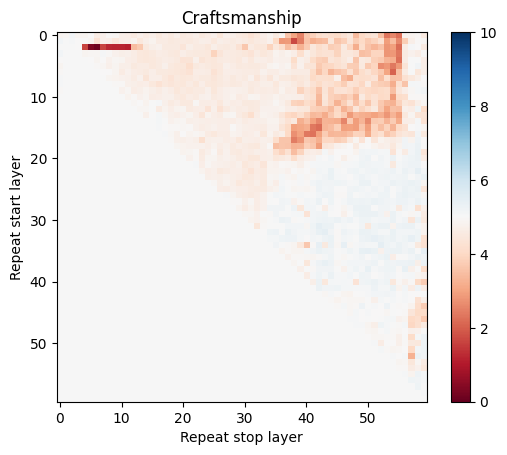

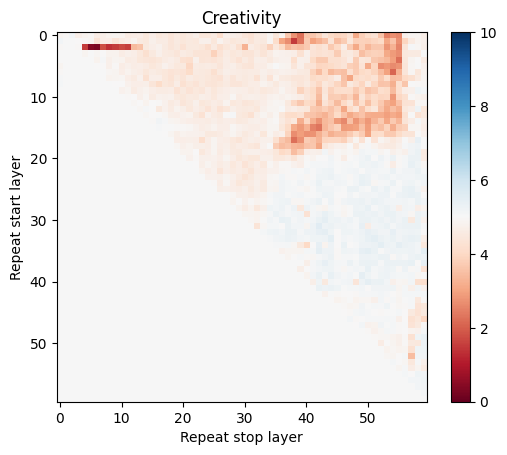

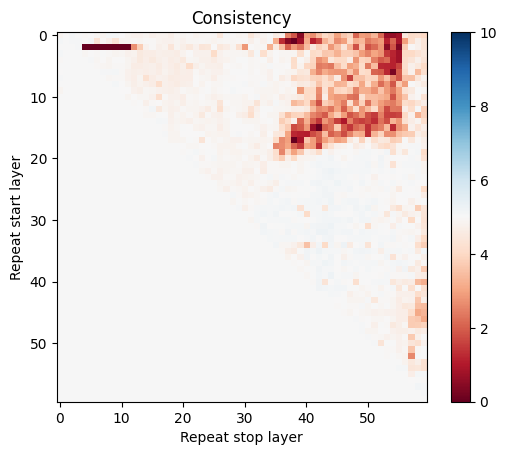

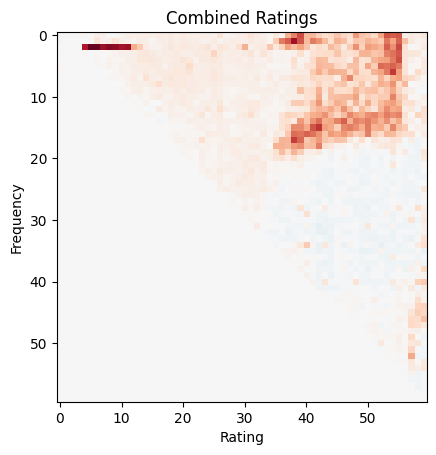

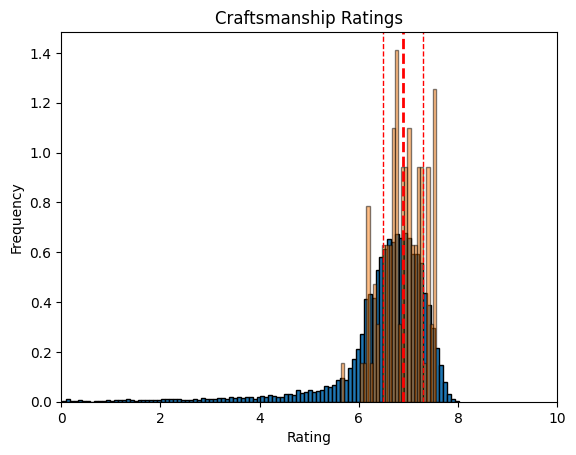

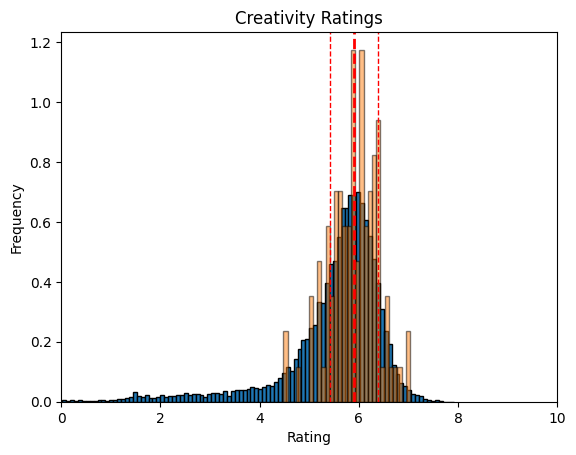

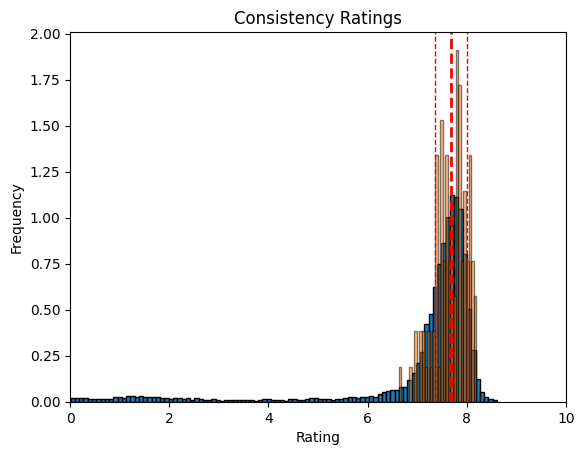

Top
Craftsmanship
averages=[('0_0', 6.758905467987452), ('0_1', 6.809668504752699), ('0_2', 7.015916555847954), ('1_2', 6.937171990074276), ('0_3', 6.741683075876291), ('1_3', 6.8693608195004385), ('2_3', 6.868620830337889), ('0_4', 6.76134994079285), ('1_4', 6.900919309390467), ('2_4', 3.5279548864214236), ('3_4', 6.737904060620534), ('0_5', 6.8698783172986495), ('1_5', 6.790863206894298), ('2_5', 2.2273614491679523), ('3_5', 6.81094431968207), ('4_5', 6.879461396220319), ('0_6', 6.539735074033078), ('1_6', 6.195806301252113), ('2_6', 2.04850348529601), ('3_6', 6.781790991054649), ('4_6', 6.750954232340926), ('5_6', 6.842679585814537), ('0_7', 6.620090649884901), ('1_7', 6.630420572619478), ('2_7', 3.518705760694852), ('3_7', 6.9345105963351), ('4_7', 6.874750876736705), ('5_7', 6.79580944534608), ('6_7', 6.860647457792274), ('0_8', 6.839374921407844), ('1_8', 6.6153964673447945), ('2_8', 3.1408676888550415), ('3_8', 6.816743892171982), ('4_8', 6.6645402327367576), ('5_8', 6.657117755

In [9]:
directory = 'Ratings/Mixtral/'
fileName = directory + 'Nous-Capybara-34B-4.0bpw-stories_{}_Ratings_Mixtral_instruct2.p'

nousMixtral = getAllRatings(fileName)

plotAllHistograms(nousMixtral)


print('Top')
print("Craftsmanship")
topN(nousMixtral['Craftsmanship'], 10)
print("Creativity")
topN(nousMixtral['Creativity'], 10)
print("Consistency")
topN(nousMixtral['Consistency'], 10)


combined_dict = {}
for key in nousMixtral['Craftsmanship']:
    combined_dict[key] = nousMixtral['Craftsmanship'][key] + nousMixtral['Creativity'][key] + nousMixtral['Consistency'][key]
print('Combined')
topN(combined_dict, 10)


print('Bottom')

print("Craftsmanship")
bottomN(nousMixtral['Craftsmanship'], 10)
print("Creativity")
bottomN(nousMixtral['Creativity'], 10)
print("Consistency")
bottomN(nousMixtral['Consistency'], 10)
print('Combined')
bottomN(combined_dict, 10)




In [17]:
def compareHistograms(ratingsDict1, ratingsDict2, ratingsDict3, criteria, legend):

    
    ratingList1 = []
    for l in ratingsDict1[criteria].values():
        ratingList1.extend(l)

    ratingList2 = []
    for l in ratingsDict2[criteria].values():
        ratingList2.extend(l)
    
    ratingList3 = []
    for l in ratingsDict3[criteria].values():
        ratingList3.extend(l)

    scores = np.array(range(10))
    ratingList1 = [np.sum(scores*np.array(v)) for v in ratingList1]
    ratingList2 = [np.sum(scores*np.array(v)) for v in ratingList2]
    ratingList3 = [np.sum(scores*np.array(v)) for v in ratingList3]

    print(f'{ratingList1=}')
    print(f'{ratingList2=}')
    print(f'{ratingList3=}')

    plt.figure()
    plt.title(f'{criteria} Ratings')
    plt.hist([ratingList1, ratingList2, ratingList3],histtype='bar', bins=30, edgecolor='black', density=True)
    plt.legend(legend)


ratingList1=[5.19667178203963, 0.72027693228722, 4.092302822997681, 5.205195649527923, 4.898133292209877, 4.577495291885498, 5.566156852728454, 3.7824886630702395, 5.280265616218458, 5.599212901423016, 3.4423316449432377, 0.5170630295083356, 5.287445090688379, 4.750950952191488, 5.422162071249659, 5.513408969476586, 5.340268730287789, 5.379549835204671, 5.2182678806782405, 5.316660503342064, 5.073830846945839, 3.265301665465813, 5.361004420596146, 5.647838696004328, 5.45775883462602, 6.294498169115286, 5.502583505331131, 4.314832591554477, 5.399992207589094, 3.7684682963347313, 5.644547243978423, 3.2432715745835594, 6.176515654057084, 4.679802505677799, 5.566826890819925, 5.934632751786921, 4.01907400177879, 2.293001933487176, 5.374874186753004, 5.804881758719603, 5.44201971340226, 4.852063557453221, 5.953836230163688, 4.874158829208227, 5.6376684206334176, 5.238628253056959, 5.279440170814723, 4.298945181506497, 5.368451004644157, 5.431711363024078, 2.0827763553920704, 5.1342795999844

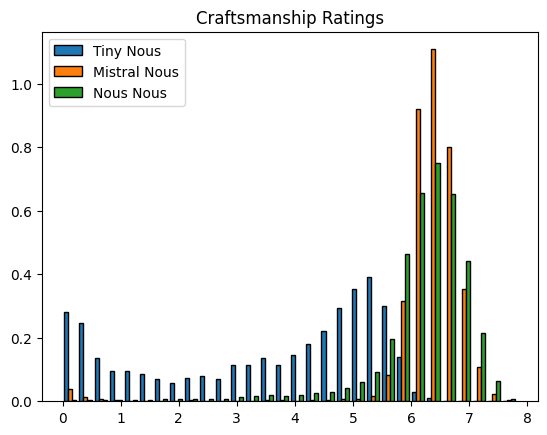

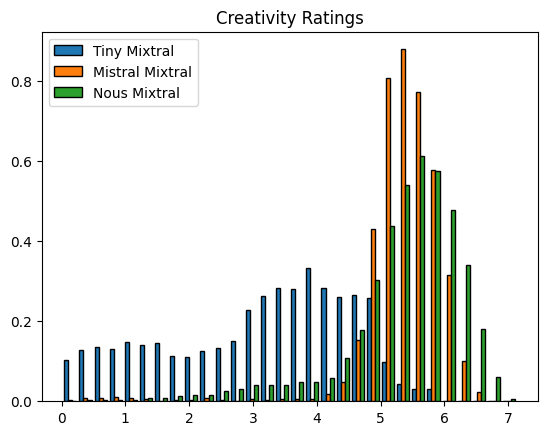

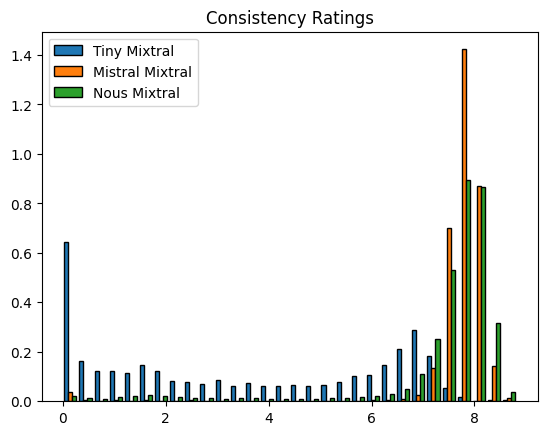

In [18]:
compareHistograms(tinyMixtral, mistralMixtral, nousMixtral, criteria = 'Craftsmanship', legend=['Tiny Nous', 'Mistral Nous', 'Nous Nous'])
compareHistograms(tinyMixtral, mistralMixtral, nousMixtral, criteria = 'Creativity', legend=['Tiny Mixtral', 'Mistral Mixtral', 'Nous Mixtral'])
compareHistograms(tinyMixtral, mistralMixtral, nousMixtral, criteria = 'Consistency', legend=['Tiny Mixtral', 'Mistral Mixtral', 'Nous Mixtral'])

ratingList1=[5.002463115731669, 4.309442446849023, 5.006926863280647, 5.893154491169678, 5.117336847975122, 5.106659757296357, 5.166188459387572, 5.317986668120431, 5.004372772626654, 5.063594260426739, 3.811000977935071, 4.999734441890251, 5.065041602533483, 5.129959527940236, 5.079081772292383, 6.660363560950405, 5.121007110855647, 5.770606464359376, 5.0635562345003455, 5.1158927419725275, 5.473141031622291, 4.665929725460889, 5.067362154484243, 6.117494223817541, 5.928763757284351, 6.383071394335234, 5.619062137273531, 4.999804183940153, 5.6674543436667335, 4.925187155082424, 5.954951979074858, 5.0444298416712865, 5.924458389423444, 4.963221581321954, 5.639730365618767, 5.929447373668475, 5.088942219636572, 5.074408577859671, 5.0551971031255025, 5.356276841697702, 5.024083942584118, 7.108845422912729, 5.343129501155561, 5.767477985121663, 5.413456421108754, 5.768900701696277, 5.594375785159519, 4.843452105599938, 5.10858265709069, 5.551433575242796, 4.941431751408309, 5.568909963167

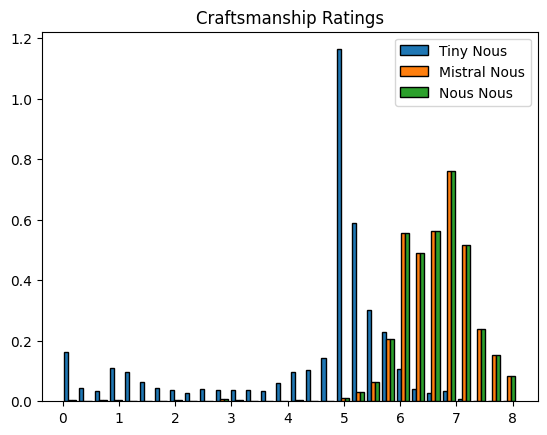

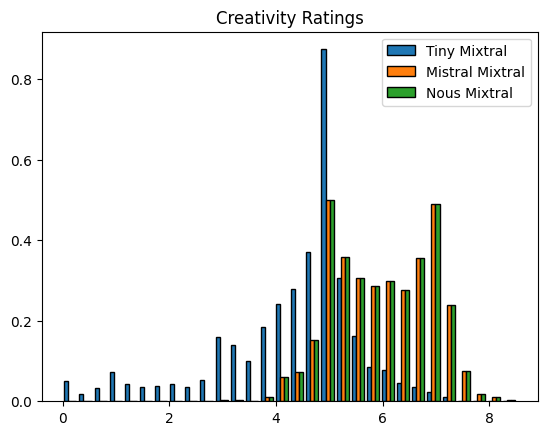

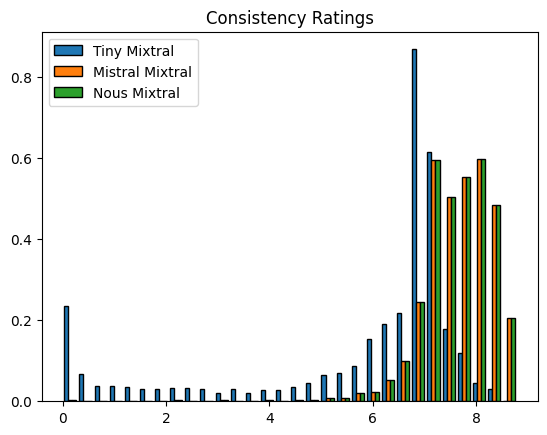

In [ ]:
compareHistograms(tinyMistral, mistralMistral, nousMistral, criteria = 'Craftsmanship', legend=['Tiny Nous', 'Mistral Nous', 'Nous Nous'])
compareHistograms(tinyMistral, mistralMistral, nousMistral, criteria = 'Creativity', legend=['Tiny Mixtral', 'Mistral Mixtral', 'Nous Mixtral'])
compareHistograms(tinyMistral, mistralMistral, nousMistral, criteria = 'Consistency', legend=['Tiny Mixtral', 'Mistral Mixtral', 'Nous Mixtral'])